# Boston Bluebikes Data Exploration and Visualization
## by Yang Li

## Investigation Overview

Bluebikes is Metro Boston's public bike share program, with over 2,500+ bikes and more than 260+ stations across Boston, Brookline, Cambridge and Somerville. There are two types of user: subscribers are annual or monthly members; customers are single trip or day pass users. I want to profile each type of user's biking habit by analyzing their demographics and bike usage. This can help to decide if the current pricing strategy should be improved and find potential business opportunities.

## Dataset Overview

I downloaded Bluebikes Q2 data of 2019 (April, May and June) to explore bike use in this area. I did some preliminary wrangling and finally there are 663,800 individual rides in this dataset with 8 features: 

 - tripduration in sec
 - starttime
 - stoptime
 - start station name
 - end station name
 - usertype
 - birth year
 - gender

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('final-bluebikes.csv')

# change data type of starttime and stoptime to datetime
df['starttime'] = pd.to_datetime(df['starttime'])
df['stoptime'] = pd.to_datetime(df['stoptime'])

# change data type of usertype and gender to category
df['usertype'] = pd.Categorical(df['usertype'], categories=['Subscriber', 'Customer'], ordered=True)
df['gender'] = pd.Categorical(df['gender'], categories=['Female', 'Male', 'Other'], ordered=True)

# create a birth_decade column
bins = np.arange(1920, df.birth_year.max()+10, 10)
labels = [str(x)+'s' for x in bins[:-1]]
df['birth_decade'] = pd.cut(df.birth_year, bins=bins, labels=labels, right=False, include_lowest=True)

df.head(1)

,tripduration,starttime,stoptime,start_station_name,end_station_name,usertype,birth_year,gender,birth_decade,hour,weekday,duration_min,duration_h
0,3363,2019-04-01 00:04:38.140,2019-04-01 01:00:41.639,Union Square - Brighton Ave at Cambridge St,Union Square - Brighton Ave at Cambridge St,Customer,1969,Female,1960s,0,Monday,56,0


In [3]:
df_short = pd.read_csv('final-bluebikes-short.csv')

# change data type of starttime and stoptime to datetime
df_short['starttime'] = pd.to_datetime(df_short['starttime'])
df_short['stoptime'] = pd.to_datetime(df_short['stoptime'])

# change data type of usertype and gender to category
df_short['usertype'] = pd.Categorical(df_short['usertype'], categories=['Subscriber', 'Customer'], ordered=True)
df_short['gender'] = pd.Categorical(df_short['gender'], categories=['Female', 'Male', 'Other'], ordered=True)

# create a birth_decade column
bins = np.arange(0, df_short.duration_min.max()+5, 5)
labels = [str(x) + '-' + str(x+5) for x in bins[:-1]]
df_short['interval_min'] = pd.cut(df_short.duration_min, bins=bins, labels=labels, 
                                  right=False, include_lowest=True)
df_short.head(1)

,tripduration,starttime,stoptime,start_station_name,end_station_name,usertype,birth_year,gender,birth_decade,hour,weekday,duration_min,interval_min
0,3363,2019-04-01 00:04:38.140,2019-04-01 01:00:41.639,Union Square - Brighton Ave at Cambridge St,Union Square - Brighton Ave at Cambridge St,Customer,1969,Female,1960s,0,Monday,56,55-60


In [4]:
df_long = pd.read_csv('final-bluebikes-long.csv')

# change data type of starttime and stoptime to datetime
df_long['starttime'] = pd.to_datetime(df_long['starttime'])
df_long['stoptime'] = pd.to_datetime(df_long['stoptime'])

# change data type of usertype and gender to category
df_long['usertype'] = pd.Categorical(df_long['usertype'], categories=['Subscriber', 'Customer'], ordered=True)
df_long['gender'] = pd.Categorical(df_long['gender'], categories=['Female', 'Male', 'Other'], ordered=True)

# create a birth_decade column
bins = np.arange(1, 25, 1)
labels = [str(x) + '-' + str(x+1) for x in bins[:-1]]
df_long['interval_h'] = pd.cut(df_long.duration_h, bins=bins, labels=labels, 
                               right=False, include_lowest=True)
df_long.head(1)

,tripduration,starttime,stoptime,start_station_name,end_station_name,usertype,birth_year,gender,birth_decade,hour,weekday,duration_min,duration_h,interval_h
0,45491,2019-04-01 07:25:50.715,2019-04-01 20:04:02.313,Egleston Square - Atherton St at Washington St,Egleston Square - Atherton St at Washington St,Customer,1969,Female,1960s,7,Monday,758,12,12-13


## User Type's Demographics

First of all, let's see the proportion of each user type in a pie chart. About three fourth of users are subscribers.

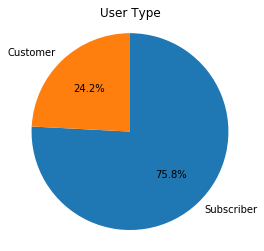

In [5]:
sorted_counts = df['usertype'].value_counts()
plt.pie(sorted_counts, labels=sorted_counts.index, autopct='%1.1f%%', startangle=90, counterclock=False)
plt.axis('square')
plt.title('User Type');

The below histograms show birth decade distribution and gender distribution by user type. The majority of subscribers were born in 80s and 90s while the majority of customers were born in 60s and 90s. The majority of subscribers are male and there are more females customers than males customers.

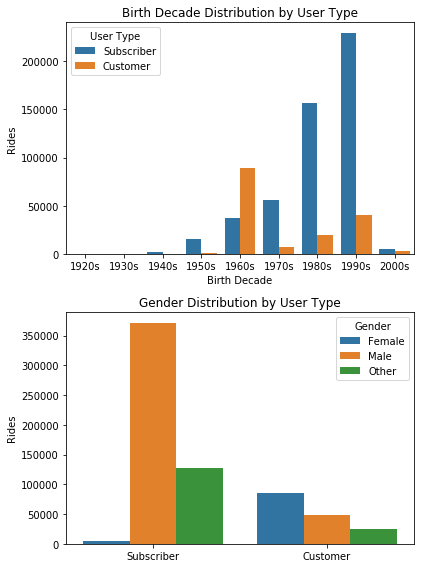

In [6]:
fig, ax = plt.subplots(nrows=2, figsize = [6, 8])

sb.countplot(data=df, x='birth_decade', hue='usertype', ax=ax[0])
ax[0].set(xlabel='Birth Decade', ylabel='Rides')
ax[0].set_title('Birth Decade Distribution by User Type')
ax[0].legend(loc=2, title='User Type')

sb.countplot(data=df, x='usertype', hue='gender', ax=ax[1])
ax[1].set(xlabel='', ylabel='Rides')
ax[1].set_title('Gender Distribution by User Type')
ax[1].legend(title='Gender')

plt.tight_layout();

## Ride Count Distribution by Hour and Weekday

The below charts show that subscribers use bikes more often during morning and evening peak hours on weekdays while customers use bike more often in the afternoon on weekends. This may indicate that subscribers use bikes for work while customers use bikes for leisure. I can conclude that most subscribers are commuters and most customers are visitors.

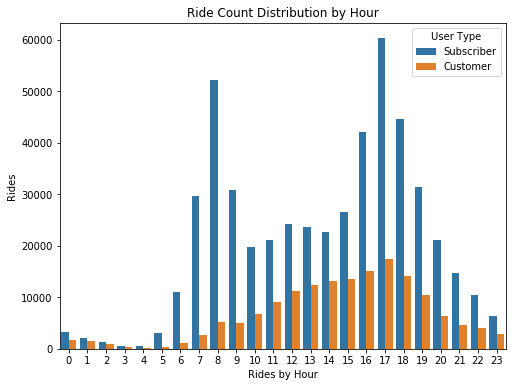

In [7]:
plt.figure(figsize = [8, 6])

ax = sb.countplot(data=df, x='hour', hue='usertype')
ax.set(xlabel='Rides by Hour', ylabel='Rides')
ax.set_title('Ride Count Distribution by Hour')
ax.legend(title='User Type');

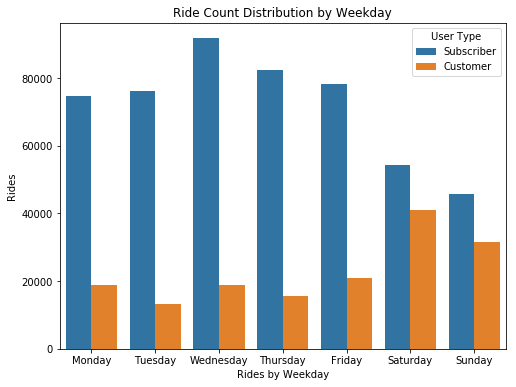

In [8]:
plt.figure(figsize = [8, 6])
ax = sb.countplot(data=df, x='weekday', hue='usertype')
ax.set(xlabel='Rides by Weekday', ylabel='Rides')
ax.set_title('Ride Count Distribution by Weekday')
ax.legend(title='User Type');

## Ride Duration Distribution by Hour

To better view the result, I split the data to short rides that are less than 1 hour (top chart) and long rides that are over 1 hour (bottom chart).

The top chart shows that subscribers usually take short rides that last 5-10 minutes while customers prefer to take longer rides. If we take 35-minute as a cut-off, we can see that more subscribers than customers take short rides on the left and more customers than subscribers take longer rides on the right. The bottom chart shows that most long rides are taken by customers and most of them are no more than 2 hours.

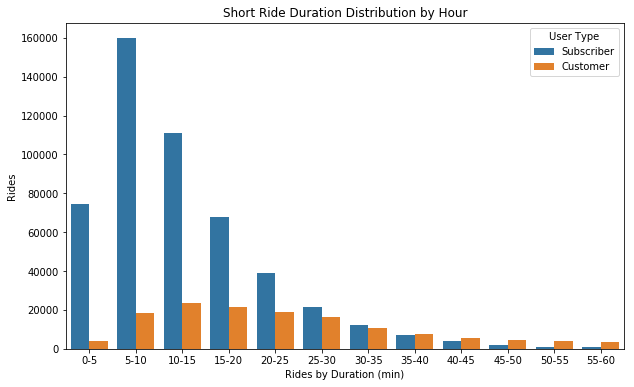

In [9]:
plt.figure(figsize = [10, 6])

ax = sb.countplot(data=df_short, x='interval_min', hue='usertype')
ax.set(xlabel='Rides by Duration (min)', ylabel='Rides')
ax.set_title('Short Ride Duration Distribution by Hour')
ax.legend(title='User Type');

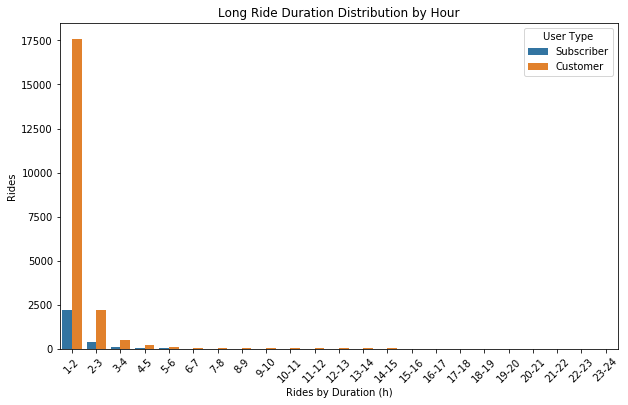

In [10]:
plt.figure(figsize = [10, 6])

ax = sb.countplot(data=df_long, x='interval_h', hue='usertype')
ax.set(xlabel='Rides by Duration (h)', ylabel='Rides')
ax.set_title('Long Ride Duration Distribution by Hour')
plt.xticks(rotation=45)
ax.legend(title='User Type');

## Most Popular Biking Routes of Subscribers

Among the top 10 subscriber routes, they have either a start station or an end station at MIT. Harvard is close to MIT and also has easy access to Bluebikes. But probably due to the comparably higher membership rate, Harvard does not use Bluebikes as often as MIT. 

In [11]:
# create a route column
df['route'] = df['start_station_name'] + ' --> ' + df['end_station_name']

# display full content
pd.set_option('display.max_colwidth', -1)

df_sub = df.query('usertype == "Subscriber"')['route'].value_counts()[:10]
df_sub = df_sub.reset_index(name='count') # create a DataFrame to show the result
df_sub.rename(columns={'index': 'Route', 'count': 'Rides'}, inplace=True)
rank = np.arange(1, 11, 1)
df_sub['Rank'] = rank
df_sub.style.hide_index() # hide index

Route,Rides,Rank
MIT Pacific St at Purrington St --> MIT Stata Center at Vassar St / Main St,1670,1
MIT at Mass Ave / Amherst St --> Beacon St at Massachusetts Ave,1396,2
Beacon St at Massachusetts Ave --> MIT at Mass Ave / Amherst St,1374,3
MIT Vassar St --> MIT Stata Center at Vassar St / Main St,1230,4
MIT Stata Center at Vassar St / Main St --> MIT Pacific St at Purrington St,1208,5
MIT at Mass Ave / Amherst St --> MIT Vassar St,1087,6
Central Square at Mass Ave / Essex St --> MIT Pacific St at Purrington St,959,7
MIT Vassar St --> MIT at Mass Ave / Amherst St,909,8
MIT Stata Center at Vassar St / Main St --> MIT Vassar St,901,9
MIT at Mass Ave / Amherst St --> Central Square at Mass Ave / Essex St,853,10


## Most Popular Biking Routes of Customers

Among the top 10 customer routes, 9 routes have the same start station and end station. This indicates that customers usually return bikes at the location where they initially rent bikes. This is probably due to that they are not familiar with the city and prefer to return bikes at the same location. 

In [12]:
df_cus = df.query('usertype == "Customer"')['route'].value_counts()[:10]
df_cus = df_cus.reset_index(name='count') 
df_cus.rename(columns={'index': 'Route', 'count': 'Rides'}, inplace=True)
df_cus['Rank'] = rank
df_cus.style.hide_index()

Route,Rides,Rank
Mugar Way at Beacon St --> Mugar Way at Beacon St,833,1
Murphy Skating Rink - 1880 Day Blvd --> Murphy Skating Rink - 1880 Day Blvd,580,2
Airport T Stop - Bremen St at Brooks St --> Airport T Stop - Bremen St at Brooks St,400,3
Harvard University River Houses at DeWolfe St / Cowperthwaite St --> Harvard University River Houses at DeWolfe St / Cowperthwaite St,354,4
Harvard Square at Mass Ave/ Dunster --> Harvard Square at Mass Ave/ Dunster,264,5
Beacon St at Massachusetts Ave --> Beacon St at Massachusetts Ave,258,6
Tremont St at West St --> Tremont St at West St,258,7
Boylston St at Arlington St --> Boylston St at Arlington St,258,8
Aquarium T Stop - 200 Atlantic Ave --> Aquarium T Stop - 200 Atlantic Ave,251,9
MIT at Mass Ave / Amherst St --> Harvard Square at Mass Ave/ Dunster,244,10


## Summary

According to the analysis, I can profile subscribers and customers as:

 - **Subscribers: male, born in 80s and 90s, commuters**
 - **Customers: female > male, born in 60s and 90s, visitors**

The below charts show the relationship between hour and ride duration by user type and weekday to summarize each user type's biking habits.

 - **Subscribers take more short rides (5-15 minutes) at 8am and 5pm on weekdays while they use bikes more often from 10am to 7pm on weekends**.
 - **Customers take more short rides (10-25 minutes) at 5pm on weekdays while they take more longer rides from 12pm to 7pm on weekends**.

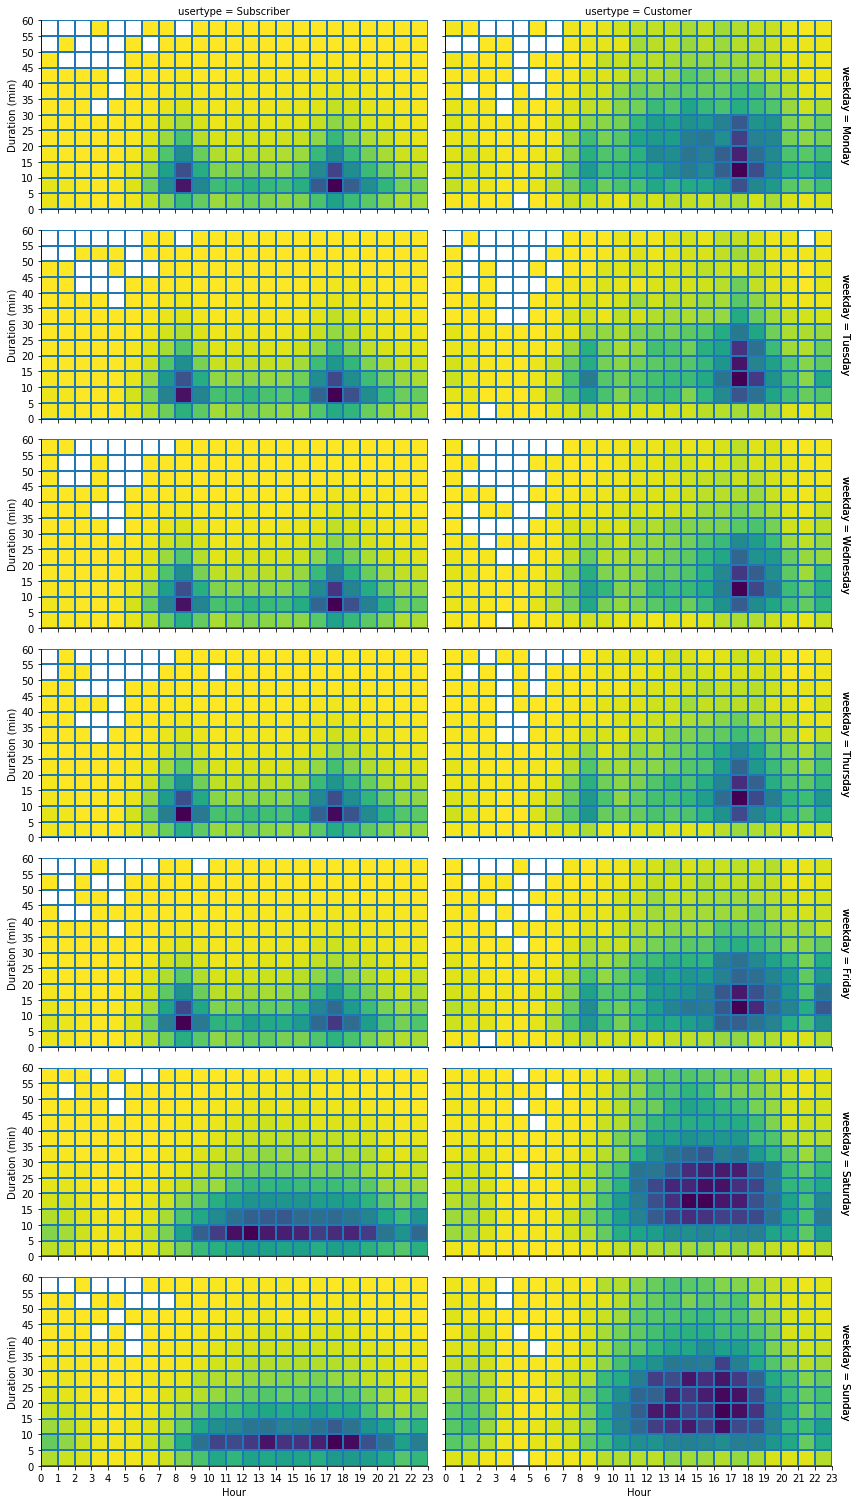

In [19]:
df_short.rename(columns={'hour': 'Hour', 'duration_min': 'Duration (min)'}, inplace=True)

g = sb.FacetGrid(data=df_short, col='usertype', row='weekday', height=3, aspect=2, margin_titles=True)
xbin = np.arange(0, 24, 1)
ybin = np.arange(0, 65, 5)
g.map(plt.hist2d, 'Hour', 'Duration (min)', bins=[xbin, ybin], cmap='viridis_r', cmin=0.5)
g.set(xticks=xbin, yticks=ybin)
g.set_titles('{col_name}');

## Ways to improve

 - I can see that MIT students and employees who have a more discounted membership use Bluebikes more often. **Bluebikes could partner with more local colleges and companies to provide discounted membership to attract more subscribers**.
 - Visitors are usually not familiar with the city and may not even know the service provided by Bluebikes. **Bluebikes could design several classic biking routes for visitors to tour the most popular atractions and partner with CityPASS or other tourism programs to advertise the routes**.